In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [2]:
df = pd.read_csv("../Datasets/Stem-Cuvinte-Eliminate/test-punct-stop-stem-1000.csv")
df=df.dropna()
#df=df.drop(["news_title","url","reddit_title"],axis=1)

In [3]:
print(df)

        sentiment                                               text
0               2  love pat one great voic gener listen cd year s...
1               2  despit fact play small portion game music hear...
2               0  bought charger 2003 work ok design nice conven...
3               2  check energi websit charger work minut rapid c...
4               2  review quit bit combo player hesit due review ...
...           ...                                                ...
399995          0  bought thoma son huge thoma fan huge set room ...
399996          0  son reciev birthday gift 2 month ago love even...
399997          0  bought toy son love thoma toy need one batteri...
399998          2  compil wide rang articl best famou writer scho...
399999          0  dvd disappoint get hope see substanti portion ...

[399997 rows x 2 columns]


In [4]:
X_train = df['text']

max phrase len: 108


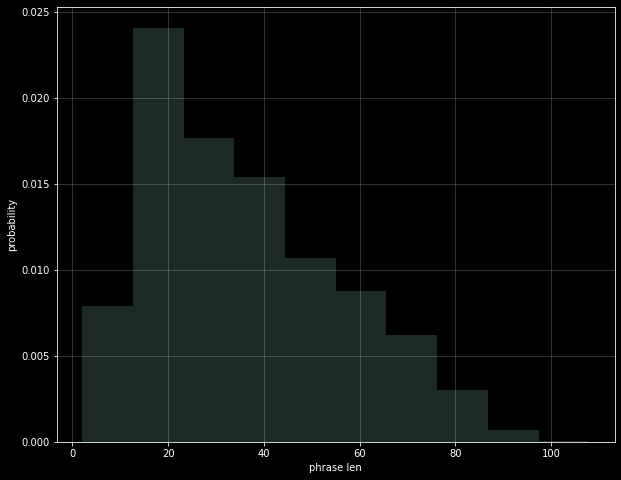

In [5]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid(alpha = 0.25)

In [6]:
y_train = df['sentiment'].values

In [7]:
train_labels=[]
for i in range(0,len(y_train)):
    train_labels.append([0,0])

In [8]:
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        train_labels[i][0]=1
    else:
        train_labels[i][1]=1

In [9]:
train_labels=np.array(train_labels)

In [10]:
import pickle
with open('tokenizer-200.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [11]:
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)

In [12]:
print(X_train[0])
print(train_labels[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   15
 3432    3   10  290  338  112   29   27   60   15   43    8 1693   18
   91   35   83 1693    4 2049 1735   29  103  675  490  624    3  103
 2146 1648 2875   29    1   56   68  150  802 2180   59   14  474  372
  521  397   78 1470 1152 1804   47    3   40  412]
[0 1]


In [13]:
from tensorflow import keras
model = keras.models.load_model('./Model-200-2/')

2022-02-17 09:22:37.979066: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 09:22:37.999279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 09:22:38.000173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-17 09:22:38.001500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
model.evaluate(X_train, train_labels)

2022-02-17 09:22:40.230876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


12177/12500 [============================>.] - ETA: 8s - loss: 0.2661 - accuracy: 0.9060

In [16]:
model.save("./Model-9215/")

2022-02-09 23:26:28.194025: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./Model-9215/assets
